In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python

IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import cv2
import matplotlib
import os
from matplotlib import pyplot as plt
%matplotlib inline

Preprocessing: Detection of Face and Eyes

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
img.shape

(1024, 683, 3)

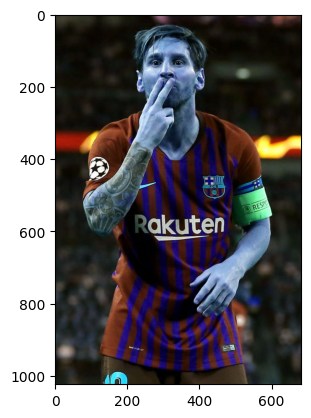

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
plt.imshow(img1)

- The above represents the x and y values and 3 here represents the RGB colour

- This is done to show the image

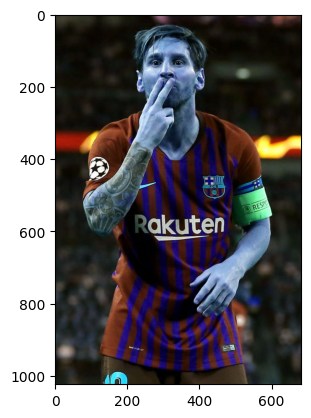

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 683)

In [ ]:
gray

array([[52, 51, 51, ..., 60, 60, 60],
       [53, 52, 52, ..., 55, 55, 55],
       [53, 53, 52, ..., 49, 49, 49],
       ...,
       [28, 29, 31, ..., 35, 35, 35],
       [28, 30, 31, ..., 34, 34, 34],
       [28, 30, 31, ..., 36, 36, 36]], dtype=uint8)

- This helps us give the gray scale image. If you see in the above output after shape. The RGB value is not present.

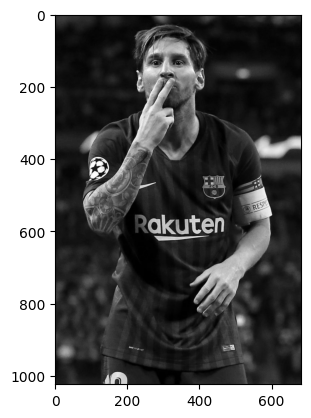

In [ ]:
plt.imshow(gray, cmap='gray')

In the implementation below we use a method called Haar Cascade.
Here we are importing the opencv files(xml) for detecting face and eyes. An array of the faces detected is returned in the output.

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[222,  61, 179, 179]], dtype=int32)

- Below, we are storing the face in x,y,w,h

In [ ]:
(x,y,w,h)=faces[0]
x,y,w,h

(222, 61, 179, 179)

Here, we are drawing a rectangle around face in img (which is our original image)

The dimensions of the rectangle are given by (x,y) and (x+w,y+h). (255,0,0) represents the RGB value. So the rectangle will be red in colour.

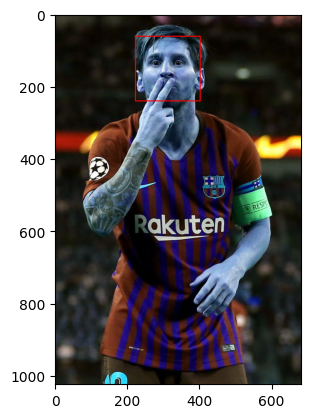

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

The below snippet is taken from opencv documentation. This is used to draw the 2 eyes.
Here we are basically iterating through all the faces(only one in this case). Here we are again drawing a rectangle and then performing eye cascade.

Here roi_colour reprents the part in the rectangular region.

Eyes are displayed in green

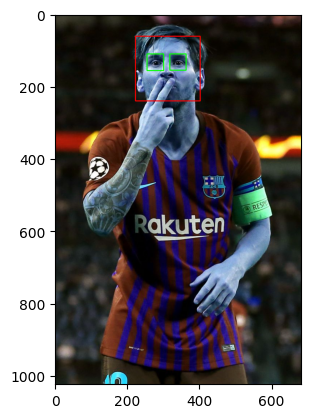

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

Preprocessing 2 : Cropping the facial region

Here the cropped images are obtained and this is then collected and put in a seperate folder for training our model.

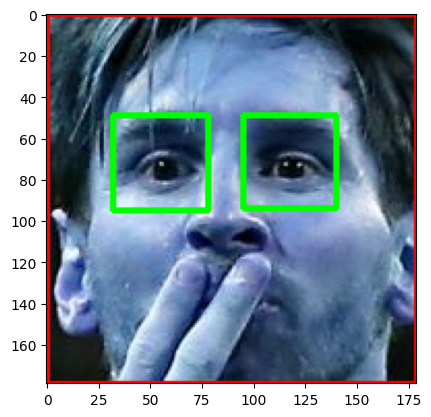

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(179, 179, 3)

Preprocessing 3: Wavelet transform

- In wavelet transformed image, we can see
  edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

- pywt is used for wavelet in transform



In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

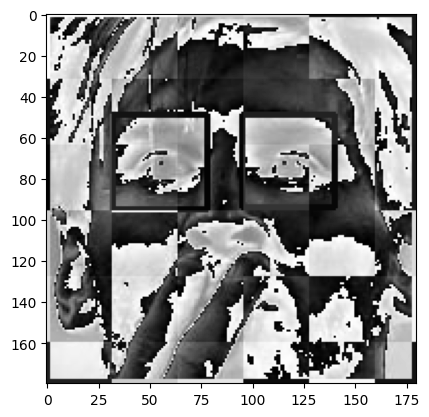

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

- Preprocessing 3:
 Below, we are simply creating a function that accepts the image path and gives the cropped image if both the face and eyes are detected.

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

Just enter the image path and show image using plt. This can be done for any image by entering the path

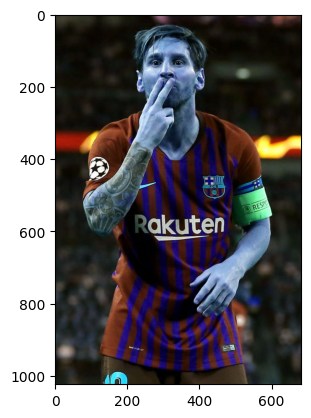

In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
plt.imshow(original_image)

now the cropped image is obtained. We get the cropped image only if the face and the 2 eyes are detected completely.

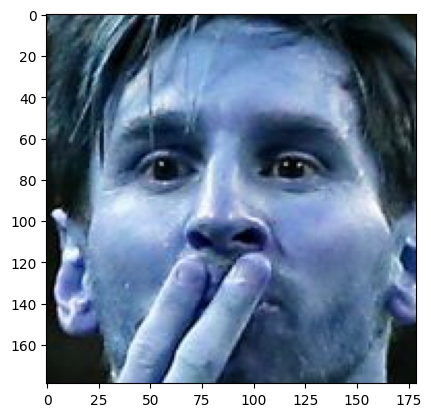

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg')
plt.imshow(cropped_image)
plt.imshow(cropped_image)

Below, we are showing an example of a None value being returned since both the eyes aren't detected

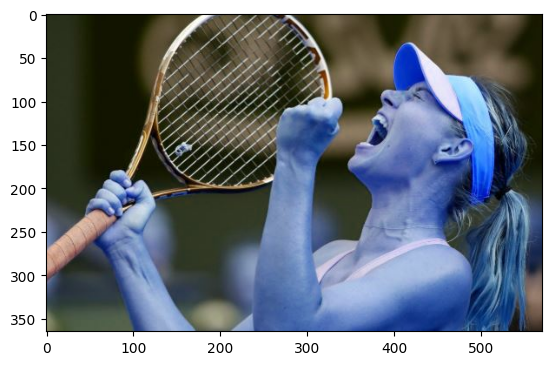

In [ ]:
org_image_obstructed = cv2.imread('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
plt.imshow(org_image_obstructed)

- We ignore the images in which both the eyes aren't detected and don't use this to train our model

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/drive/MyDrive/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
cropped_image_no_2_eyes

Now we are creatig a cropped folder.

In [ ]:
path_to_data = "/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset"
path_to_cr_data = "/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/cropped"

- below, we are creating and storing the paths of the sub folders in list


In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img dirs will store the names of the sub folders

In [ ]:
img_dirs

['/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/serena_williams',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/lionel_messi',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/roger_federer',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/virat_kohli',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/maria_sharapova']

In [ ]:
import shutil
# if os.path.exists(path_to_cr_data):
#      shutil.rmtree(path_to_cr_data)
# os.mkdir(path_to_cr_data)

In [ ]:
img_dirs

['/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/serena_williams',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/lionel_messi',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/roger_federer',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/virat_kohli',
 '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/maria_sharapova']

Below, we ar iterating through the image directories.
Cropped_image dirs contains the cropped folder path for the players
os.scandir helps us go through each file in the folders(images in this case)

We then check if roi is none or not. If it is not none,we store it in a cropped folder.

makeddirs is used to create a folder

We then generate file name and file path for the images

cv2.imwrite will store the cropped image in the cropped folder

File name and file path will be stored in a dictionary
for later use.

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    # if celebrity_name!="cropped":
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
          roi_color = get_cropped_image_if_2_eyes(entry.path)
          if roi_color is not None:
              cropped_folder = path_to_cr_data + celebrity_name
              if not os.path.exists(cropped_folder):
                  os.makedirs(cropped_folder)
                  cropped_image_dirs.append(cropped_folder)
                  print("Generating cropped images in folder: ",cropped_folder)
              cropped_file_name = celebrity_name + str(count) + ".png"
              cropped_file_path = cropped_folder + "/" + cropped_file_name
              cv2.imwrite(cropped_file_path, roi_color)
              celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
              count += 1



Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedlionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedroger_federer
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedvirat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedmaria_sharapova


In [ ]:
print(count," folders created")


36  folders created


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedserena_williams': ['/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams1.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams2.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams3.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams4.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams5.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams6.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams7.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_williams/serena_williams8.png',
  '/content/drive/MyDrive/CelebrityFaceRecognition/model/dataset/croppedserena_william

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedserena_williams': 0,
 'croppedlionel_messi': 1,
 'croppedroger_federer': 2,
 'croppedvirat_kohli': 3,
 'croppedmaria_sharapova': 4}

Below, we are now iterating through the dictionary
and the training files(basically all the images)
of a particular sports person

cv2.resize is used to make sure that all the images are of the same size

w2d is used to get the wavelet transformed image and this is resized as well

Now the wavelet tranformed image and the original image are stacked vertically and stored in a variable combined_image
this is done since both the images will give important information about the features.

x is used to store the combined image

y is used to store


In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

4096 is the size of each image

In [ ]:
len(X[0])

4096

In [ ]:
32*32*3 + 32*32

4096

below, is the first image

In [ ]:
X[0]

array([[ 34],
       [ 34],
       [ 49],
       ...,
       [  2],
       [253],
       [252]], dtype=uint8)

In [ ]:
y[0]

0

Values converted to float to avoid warnings and errors while training the model

In [ ]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

FROM THIS POINT ONWARDS WE WILL START TRAINING OUR MODEL.

We will use SVM with rbf kernel tuned with heuristic finetuning

The necessary modules are imported over here.


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

Down here, we are splitting x and y into x train and y train.
then we are creating 'pipeline' to scale the data.
pipe.fit is used to train the ML model on xtrain and and ytrain.
pipe.score is used to just check the accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7446808510638298

Here,classification report is used with x test and we obtain different metrics.
0-4 are the different classes that we have.

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.83      0.56      0.67         9
           2       0.62      0.83      0.71         6
           3       0.72      0.93      0.81        14
           4       0.88      0.78      0.82         9

    accuracy                           0.74        47
   macro avg       0.75      0.73      0.73        47
weighted avg       0.76      0.74      0.74        47



Using GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Here, we are considering different models like svm,random_forest and logistic_regression.

These are tested with certain values

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [ ]:
print(model_params)

{'svm': {'model': SVC(gamma='auto', probability=True), 'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}}, 'random_forest': {'model': RandomForestClassifier(), 'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}}, 'logistic_regression': {'model': LogisticRegression(solver='liblinear'), 'params': {'logisticregression__C': [1, 5, 10]}}}


In [ ]:
print(len(np.unique(y_train)))

5


Grid Search CV is tested in the code below.
in the for loop. We iterate through each model.
Pipeline is used to scale the data and the next step is to use the model to train.
After training we append the scores to a list called scores

We are then creating a data frame out of this.

In the for loop, x train and y train are internally split into training and validation sets.




In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.757143,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.628571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.807143,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

We obtain the best score for svm, random forest and logistic regression below

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.8297872340425532

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.6170212765957447

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8297872340425532

We are proceeding with svm from here after obtaining the score.

this is then stored in best_classifier

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  1,  3,  0],
       [ 0,  8,  1,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  1,  0, 13,  0],
       [ 1,  0,  1,  0,  7]])

Here, we are just using a confusion matrix.

Below y-axis is truth and x-axis is predicted.

This will tell us on how many sample our model was predicted correctly.


Here we can see that 0 (for serena) , 5 times it has given the right output and 1 time it has shown maria sharapova.
sameapplication for the remaining as well.

Text(95.72222222222221, 0.5, 'Truth')

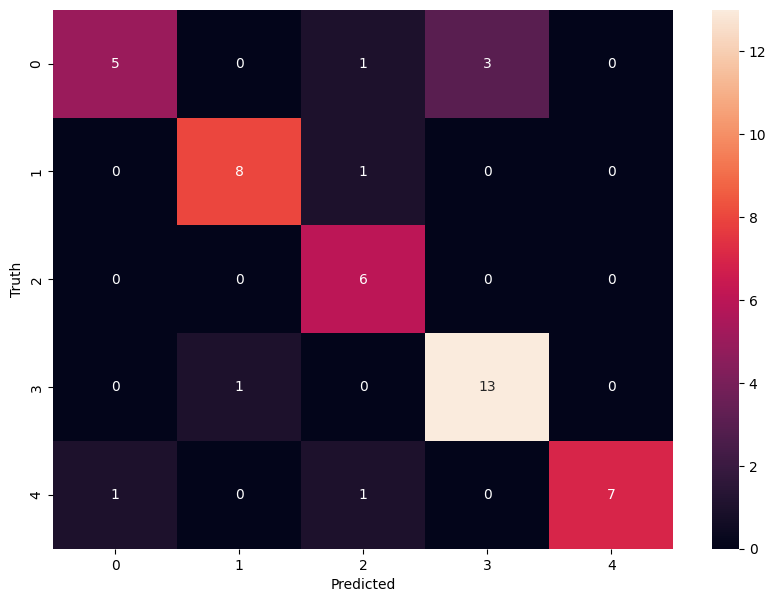

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'croppedserena_williams': 0,
 'croppedlionel_messi': 1,
 'croppedroger_federer': 2,
 'croppedvirat_kohli': 3,
 'croppedmaria_sharapova': 4}

Below we are saving the trained model

So best_clf is saved in saved_model.pkl

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Here, we are just saving the class dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))